Virtual Acoustics and Immersive Audio Workshop - CCRMA Stanford University  
28.07.25 - Orchisama Das, Gloria Dal Santo
  
### L06: Binaural rendering

In this assignment we will 
- Analyze a given HRIR dataset in SOFA format
- Interpolate the HRIRs to a denser grid and save it in SOFA format
- Listen and compare both datasets in Reaper with SPARTA's binauralizer plugin with head tracking.

In [1]:
import numpy as np
from pathlib import Path
from loguru import logger
import matplotlib.pyplot as plt
from spatial_audio.sofa_parser import HRIRReader, HRIRWriter
from spatial_audio.hrtf import HRIRInterpolator, HRIRSet
from spatial_audio.plot import plot_points_on_sphere
from utils import unpack_coordinates, cart2sph

## Part 1
- Read the HRTF dataset with `HRIRReader`
- Plot the azimuth and elevation angles at which the HRIRs were measured on a spherical grid with the `spatial_audio.plot.plot_points_on_sphere()` function.
- Note the grid spacing between azimuth angles ($\theta_\text{grid}$) and elevation angles ($\phi_\text{grid}$). Verify that the grid is equiangular (same spacing between all azimuth and elevation angles).

2025-07-28 15:29:03.898 | INFO     | spatial_audio.sofa_parser:__init__:40 - None
2025-07-28 15:29:03.899 | INFO     | spatial_audio.sofa_parser:__init__:41 - Shape of the IRs is (684, 2, 200)


R = 2 receiver (set by ReceiverPosition of dimension RCI, RCM)
E = 1 emitter (set by EmitterPosition of dimension ECI, ECM)
M = 684 measurements (set by Data_IR of dimension MRN)
N = 200 samples (set by Data_IR of dimension MRN)
C = 3 coordinate dimensions, fixed
I = 1 single dimension, fixed
S = 0 maximum string length



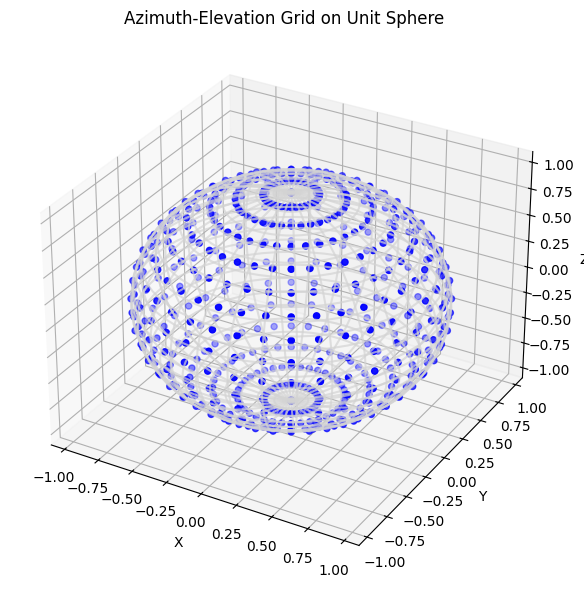

In [2]:
# Path to HRIR dataset
sofa_path = Path('../data/Week 2/hrtf/CIPIC_subject_119_equiangular_grid.sofa').resolve()

#### WRITE YOUR CODE HERE ####

# Create HRIRReader object
hrir_reader = HRIRReader(sofa_path)

# Read azimuth and elevation angles from the dataset
az = hrir_reader.listener_view[:, 0]
el = hrir_reader.listener_view[:, 1]

# Plot the azimuth and elevation angles on a sphere by calling plot_points_on_sphere
plot_points_on_sphere(az, el)

### Part 2

See `src/spatial_audio/hrtf.py`. Create an `HRIRSet` dataclass from the dataset you have just read.

In [3]:
hrir_data = HRIRSet(hrir_reader.fs, hrir_reader.num_meas, hrir_reader.ir_length, hrir_reader.ir_data,
                    hrir_reader.listener_view, hrir_reader.listener_view_type, source_view=hrir_reader.get_source_view("spherical"))

### Part 3

- Complete the function `bilinear_interpolation(new_az_res: float, new_el_res: float)` in the `HRIRInterpolator` class to interpolate the HRIRs on the new grid.
- The new grid should have a spacing of $2^\circ$ between azimuth angles and $5^\circ$ between elevation angles. This should return an object of type `HRIRSet`. 

Recall the formula for the bilinear interpolation of HRIRs,

\begin{aligned}
\hat{h}(k) &= \left(1-c_\theta\right)\left(1-c_\phi\right) h_a(k)+c_\theta\left(1-c_\phi\right) h_b(k)+ \\
&+c_\theta c_\phi h_c(k)+\left(1-c_\theta\right) c_\phi h_d(k), \\
c_\theta &= \frac{\theta \ \text{mod} \ \theta_\text{grid}}{\theta_\text{grid}}, \quad c_\phi = \frac{\phi \ \text{mod} \ \phi_\text{grid}}{\phi_\text{grid}}
\end{aligned}
where $h_a, h_b, h_c, h_d$ are the adjacent HRIRs to a new angle-pair $(\theta, \phi)$. Hint: the grid of HRIRs provided has uniform spacing between all azimuth and elevation angles.

In [ ]:
#### WRITE YOUR CODE HERE ####

# Create HRIRInterpolator object
hrir_interpolator = HRIRInterpolator(hrir_set)

# Call bilinear_interpolation function with azimuth and elevation grid spacing angles
new_az_spacing = 2
new_el_spacing = 5
new_hrir_set = hrir_interpolator.bilinear_interpolation(new_az_spacing, new_el_spacing)

### Part 5

Save the new densely sampled dataset to SOFA format using `HRIRWriter`.

In [ ]:
new_sofa_path =  Path('../data/Week 2/hrtf/densely_sampled_CIPIC_subject_119.sofa').resolve()

#### WRITE YOUR CODE HERE ####

# Create HRIRWriter object, set_list_view_as_source_pos should be True
hrir_writer = HRIRWriter(new_hrir_set)

# Save to new_sofa_path
hrir_writer.write_to_sofa(new_sofa_path)

### Part 6

Test if SOFA file saving worked properly. Plot an HRIR from the original dataset and the closest HRIR from the new dataset.

In [ ]:
# Create HRIRReader object and plot an HRIR
new_hrir_reader = HRIRReader(new_sofa_path)

# Plot HRIRs for sanity check
og_ir = hrir_reader.get_ir_corresponding_to_listener_view(np.asarray([[-90, 0, 0]])).squeeze()
new_ir = new_hrir_reader.get_ir_corresponding_to_listener_view(np.asarray([[-90, 0, 0]])).squeeze()
plt.figure()
plt.plot(og_ir.T)
plt.plot(new_ir.T)
plt.show()